# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

>Jake VanderPlas <br />
>University of Washington eScience Institute

This version of the notebook is organized with the intent of making it easier to re-use with github.

In [5]:
import numpy as np

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb
sb.set_style('whitegrid')

In [6]:
import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_dataset(filename='../data/fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    dataset = pd.read_csv(filename, index_col='Date', parse_dates=True)
    return dataset

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 15,10

In [11]:
dataset = get_fremont_dataset()
dataset.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

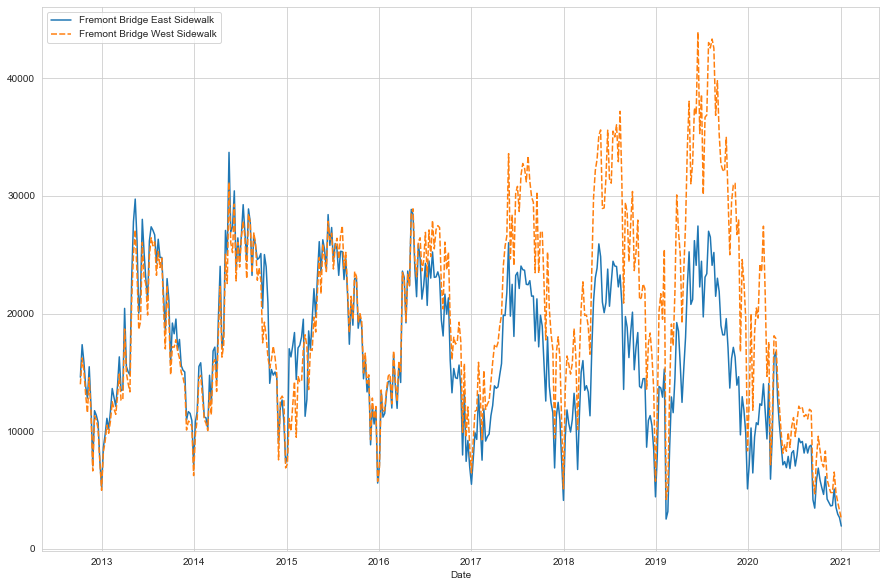

In [18]:
data_subset=dataset[['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk']]
sb.lineplot(data=data_subset.resample('W').sum())

<AxesSubplot:xlabel='Date'>

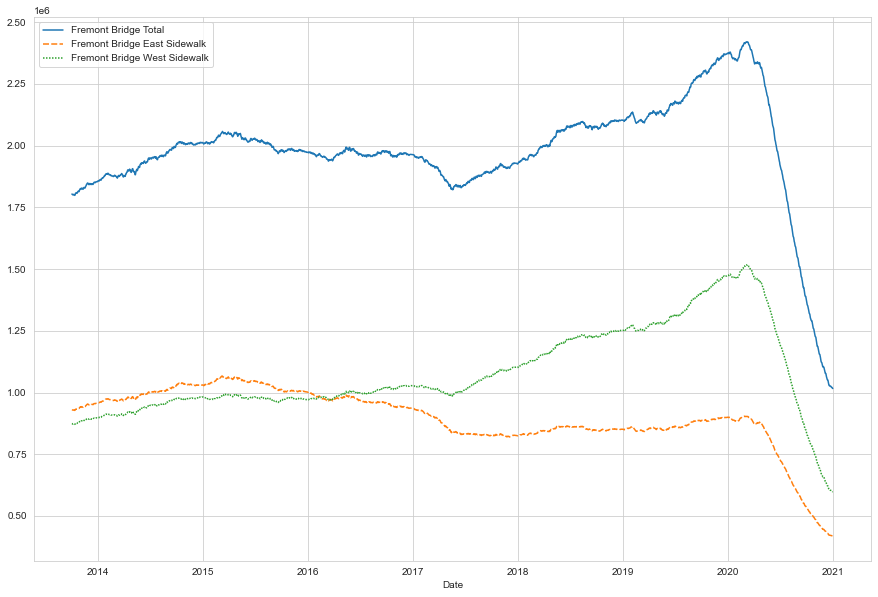

In [19]:
sb.lineplot(data=dataset.resample('D').sum().rolling(365).sum())

<AxesSubplot:xlabel='time'>

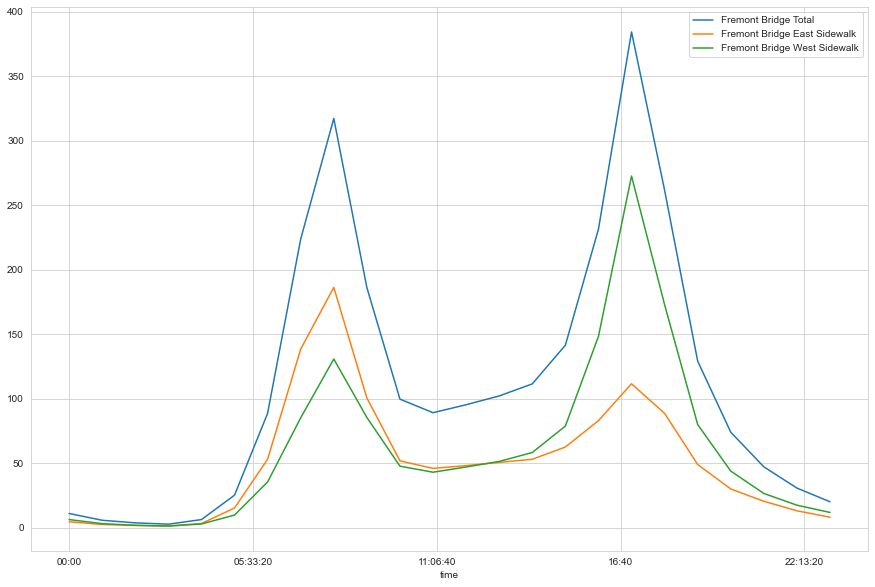

In [40]:
dataset.groupby(dataset.index.time).mean().plot()

In [43]:
pivoted = pd.pivot_table(dataset, index=dataset.index.time, columns=dataset.index.date)
pivoted.iloc[:5,:5]

Fremont Bridge East Sidewalk                                   \
                           2012-10-03 2012-10-04 2012-10-05 2012-10-06   
00:00:00                          4.0        7.0        4.0        8.0   
01:00:00                          4.0        3.0        4.0       10.0   
02:00:00                          1.0        3.0        4.0        7.0   
03:00:00                          2.0        0.0        2.0        1.0   
04:00:00                          6.0        7.0        7.0        4.0   

                     
         2012-10-07  
00:00:00        6.0  
01:00:00       12.0  
02:00:00        2.0  
03:00:00        4.0  
04:00:00        1.0

<AxesSubplot:xlabel='time'>

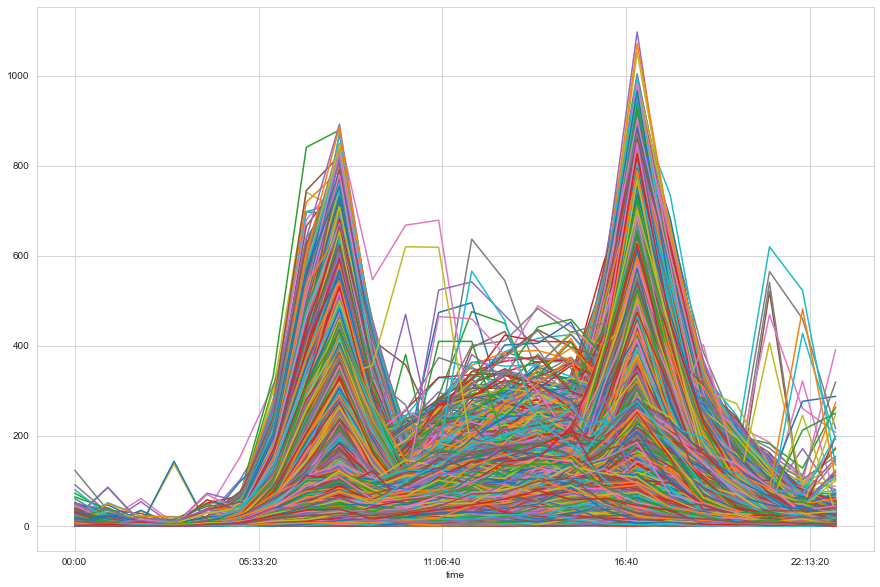

In [44]:
pivoted.plot(legend=False)

The idea was to observe if there is any traffic pattern change **depending on the day of the week**, we will use a grayscale latter to help with this visualization

<AxesSubplot:xlabel='time'>

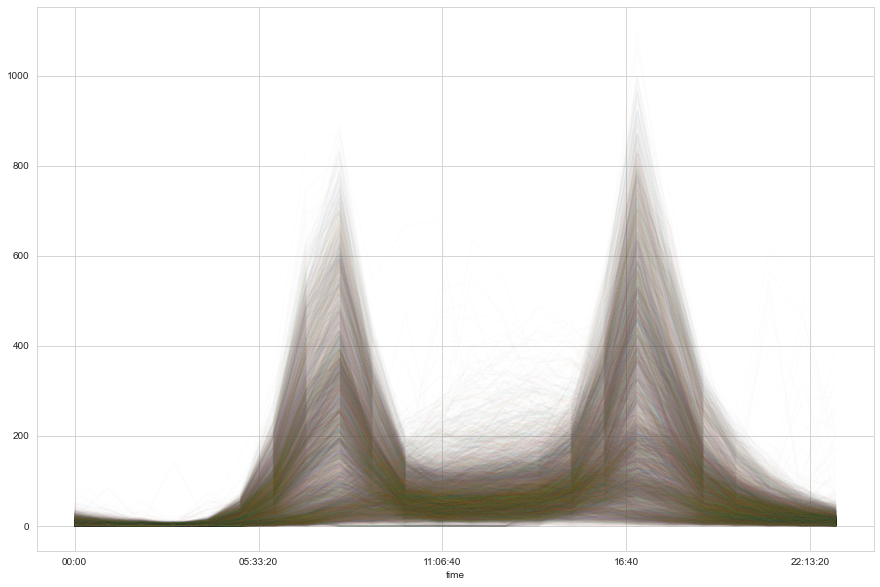

In [45]:
pivoted.plot(legend=False, alpha=0.01)

Now we can observe two main areas that could support the hypothesis that the strong dark patter which show the two peaks are commuters during the week. The other hypothesis is that the light gray pick in the middle could be generated by those commuting during the weekend.